## **Learning RL**
https://www.youtube.com/watch?v=Mut_u40Sqz4

### **1. Import dependencies**

In [11]:
# pip install stable-baselines3[extra]

In [1]:
import os
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


### **2. Load Environment**

In [15]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")

In [16]:
episodes = 5
for i in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        action = env.action_space.sample()
        n_state, reward, done, _, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(i, score))
env.close()

Episode:1 Score:40.0
Episode:2 Score:17.0
Episode:3 Score:12.0
Episode:4 Score:20.0
Episode:5 Score:39.0


#### Understanding the Environment

In [15]:
env.action_space

Discrete(2)

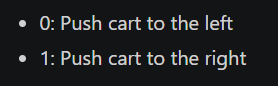

In [16]:
from PIL import Image
from IPython.display import display

image_path = 'Images/action_space_cartpole.png'
display(Image.open(image_path))

In [17]:
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

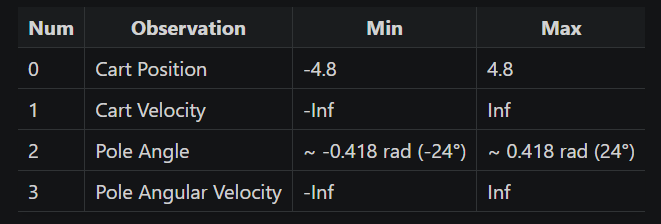

In [ ]:
from PIL import Image
from IPython.display import display

image_path = 'Images/observation_space_cartpole.png'
display(Image.open(image_path))

In [19]:
env.action_space.sample()

np.int64(1)

In [20]:
env.observation_space.sample()

array([ 3.897211  ,  0.1363492 , -0.34736785,  1.316707  ], dtype=float32)

### **3. Train an RL Model**

In [21]:
# Make your directories first.
log_path = os.path.join('Training', 'Logs')

In [22]:
environment_name = "CartPole-v1"
env = gym.make(environment_name)
env = DummyVecEnv([lambda: env]) # Wrapper
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device


d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


In [23]:
PPO?

Init signature:
PPO(
    policy: Union[str, type[stable_baselines3.common.policies.ActorCriticPolicy]],
    env: Union[gymnasium.core.Env, ForwardRef('VecEnv'), str],
    learning_rate: Union[float, Callable[[float], float]] = 0.0003,
    n_steps: int = 2048,
    batch_size: int = 64,
    n_epochs: int = 10,
    gamma: float = 0.99,
    gae_lambda: float = 0.95,
    clip_range: Union[float, Callable[[float], float]] = 0.2,
    clip_range_vf: Union[NoneType, float, Callable[[float], float]] = None,
    normalize_advantage: bool = True,
    ent_coef: float = 0.0,
    vf_coef: float = 0.5,
    max_grad_norm: float = 0.5,
    use_sde: bool = False,
    sde_sample_freq: int = -1,
    rollout_buffer_class: Optional[type[stable_baselines3.common.buffers.RolloutBuffer]] = None,
    rollout_buffer_kwargs: Optional[dict[str, Any]] = None,
    target_kl: Optional[float] = None,
    stats_window_size: int = 100,
    tensorboard_log: Optional[str] = None,
    policy_kwargs: Optional[dict[str, Any]]

In [24]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\PPO_4
-----------------------------
| time/              |      |
|    fps             | 490  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 400         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.009320116 |
|    clip_fraction        | 0.0954      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00853    |
|    learning_rate        | 0.0003      |
|    loss                 | 8.23        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0145     |
|    value_loss           | 57.4        |
-----------------------------------------
---

### **4. Save and Reload Model**

In [32]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Model_Cartpole')

In [33]:
model.save(PPO_Path)

In [34]:
del model

In [42]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper
model = PPO.load(PPO_Path, env=env)

### **5. Evaluation**

In [25]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper
avg_reward, std = evaluate_policy(model, env, n_eval_episodes=1, render=True)
env.close()

d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


In [26]:
avg_reward, std

(np.float64(494.0), np.float64(0.0))

### **6. Test Model**

In [17]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Model_Cartpole')
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper
model = PPO.load(PPO_Path, env=env)

episodes = 5
for i in range(1, episodes + 1):
    observation = env.reset()
    done = False
    score = 0

    while not done:
        action, _ = model.predict(observation) # Now using Model to predict
        observation, reward, done, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(i, score))
env.close()

d:\GITHUB\RaceCar_RL\venv\Lib\site-packages\stable_baselines3\common\on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Episode:1 Score:[500.]
Episode:2 Score:[500.]
Episode:3 Score:[500.]
Episode:4 Score:[500.]
Episode:5 Score:[500.]


### **7. Viewing Logs in Tensorboard**

In [68]:
training_log_path = os.path.join('Training', 'Logs', 'PPO_2')

In [ ]:
# http://localhost:6007/?darkMode=true#timeseries

In [71]:
!tensorboard --logdir={training_log_path}

^C


### **8. Adding a Callback to the Training Stage**

In [29]:
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [33]:
save_path = os.path.join('Training', 'Saved Models')

In [34]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

In [36]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device


In [37]:
model.learn(total_timesteps=20000, callback=eval_callback) 
env.close()

Logging to Training\Logs\PPO_5
-----------------------------
| time/              |      |
|    fps             | 46   |
|    iterations      | 1    |
|    time_elapsed    | 44   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 45           |
|    iterations           | 2            |
|    time_elapsed         | 89           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0087187225 |
|    clip_fraction        | 0.0822       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.687       |
|    explained_variance   | 0.00182      |
|    learning_rate        | 0.0003       |
|    loss                 | 6.51         |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.0121      |
|    value_loss           | 53.9         |
----------------------------

d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=450.20 +/- 99.60
Episode length: 450.20 +/- 99.60
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 450         |
|    mean_reward          | 450         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.010845898 |
|    clip_fraction        | 0.0804      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.61       |
|    explained_variance   | 0.271       |
|    learning_rate        | 0.0003      |
|    loss                 | 28.2        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0185     |
|    value_loss           | 66.8        |
-----------------------------------------
New best mean reward!
Stopping training because the mean reward 450.20  is above the threshold 200


### **9. Changing Policies**

In [41]:
net_arch = [dict(pi=[128, 128, 128, 128], vf=[128, 128, 128, 128])]

In [49]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)

model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path, policy_kwargs={'net_arch': net_arch})

Using cuda device


In [50]:
model.learn(total_timesteps=20000, callback=eval_callback) 

Logging to Training\Logs\PPO_6
-----------------------------
| time/              |      |
|    fps             | 46   |
|    iterations      | 1    |
|    time_elapsed    | 44   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 45          |
|    iterations           | 2           |
|    time_elapsed         | 90          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.013859826 |
|    clip_fraction        | 0.217       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.681      |
|    explained_variance   | 0.00473     |
|    learning_rate        | 0.0003      |
|    loss                 | 4.96        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0241     |
|    value_loss           | 22          |
-----------------------------------------
---

d:\SEM 5\ML\Package\venv\Lib\site-packages\stable_baselines3\common\evaluation.py:70: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=283.00 +/- 61.97
Episode length: 283.00 +/- 61.97
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 283         |
|    mean_reward          | 283         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.009187856 |
|    clip_fraction        | 0.0981      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.562      |
|    explained_variance   | 0.416       |
|    learning_rate        | 0.0003      |
|    loss                 | 13.3        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0163     |
|    value_loss           | 39.4        |
-----------------------------------------
New best mean reward!
Stopping training because the mean reward 283.00  is above the threshold 200


### **10. Using an Alternate Algorithm**

In [51]:
from stable_baselines3 import DQN

In [52]:
environment_name = "CartPole-v1"
env = gym.make(environment_name, render_mode="human")
env = DummyVecEnv([lambda: env]) # Wrapper

stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best=stop_callback, 
                             eval_freq=10000, 
                             best_model_save_path=save_path, 
                             verbose=1)
    
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device


In [53]:
model.learn(total_timesteps=2000)

Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.61     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 45       |
|    time_elapsed     | 1        |
|    total_timesteps  | 82       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.273    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 45       |
|    time_elapsed     | 3        |
|    total_timesteps  | 153      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.487    |
|    n_updates        | 13       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.0737   |
| time/               |          |
|    episodes         | 12       |
|    fps              | 

In [55]:
model.save("DQN_Cartpole")

del model

model = DQN.load("DQN_Cartpole")